In [1]:
import pandas as pd
import json
from pprint import pprint
import matplotlib.pyplot as plt
%run 'helper.py'

plt.close('all')

all = read_all_cards()
standard = read_standard_cards()
std = pd.DataFrame(standard)

std.tail(5)

,armor,artist,attack,cardId,cardSet,collectible,cost,dbfId,durability,elite,...,img,imgGold,locale,mechanics,name,playerClass,race,rarity,text,type
3073,NaN,James Ryman,7.0,TRL_542,Rastakhan's Rumble,True,9.0,50459,NaN,True,...,http://media.services.zam.com/v1/media/byName/...,http://media.services.zam.com/v1/media/byName/...,enUS,"[{'name': 'Rush'}, {'name': 'Overkill'}]",Oondasta,Neutral,Beast,Legendary,<b>Rush</b>\n<b>Overkill:</b> Summon a Beast f...,Minion
3074,NaN,Izzy Hoover,9.0,TRL_541,Rastakhan's Rumble,True,10.0,50454,NaN,True,...,http://media.services.zam.com/v1/media/byName/...,http://media.services.zam.com/v1/media/byName/...,enUS,[{'name': 'Deathrattle'}],"Hakkar, the Soulflayer",Neutral,NaN,Legendary,<b>Deathrattle:</b> Shuffle a Corrupted Blood ...,Minion
3075,5,Alex Horley Orlandelli,NaN,TRL_065,Rastakhan's Rumble,True,10.0,49819,NaN,True,...,http://media.services.zam.com/v1/media/byName/...,http://media.services.zam.com/v1/media/byName/...,enUS,[{'name': 'Battlecry'}],Zul'jin,Hunter,NaN,Legendary,[x]<b>Battlecry:</b> Cast all spells\nyou've p...,Hero
3076,NaN,Dave Allsop,7.0,TRL_408,Rastakhan's Rumble,True,12.0,50539,NaN,NaN,...,http://media.services.zam.com/v1/media/byName/...,http://media.services.zam.com/v1/media/byName/...,enUS,[{'name': 'Taunt'}],Grave Horror,Priest,NaN,Rare,[x]<b>Taunt</b>\nCosts (1) less for each spell...,Minion
3077,NaN,Arthur Gimaldinov,7.0,TRL_300,Rastakhan's Rumble,True,25.0,49981,NaN,True,...,http://media.services.zam.com/v1/media/byName/...,http://media.services.zam.com/v1/media/byName/...,enUS,"[{'name': 'Divine Shield'}, {'name': 'Rush'}, ...","Shirvallah, the Tiger",Paladin,Beast,Legendary,"[x]<b>Divine Shield</b>, <b>Rush</b>, <b>Lifes...",Minion


In [2]:
# std.shape
std.columns

Index(['armor', 'artist', 'attack', 'cardId', 'cardSet', 'collectible', 'cost',
       'dbfId', 'durability', 'elite', 'faction', 'flavor', 'health',
       'howToGet', 'howToGetGold', 'img', 'imgGold', 'locale', 'mechanics',
       'name', 'playerClass', 'race', 'rarity', 'text', 'type'],
      dtype='object')

In [3]:
std.describe()

,attack,cost,durability,health
count,1275.000000,2396.00000,129.000000,1420.000000
mean,2.800000,2.81803,1.821705,7.272535
std,2.403229,2.46467,1.889319,11.564981
min,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.00000,0.000000,2.000000
50%,2.000000,2.00000,2.000000,4.000000
75%,4.000000,4.00000,3.000000,6.000000
max,30.000000,25.00000,8.000000,100.000000


In [4]:
std['playerClass'].unique()


array(['Neutral', 'Shaman', 'Priest', 'Paladin', 'Warrior', 'Hunter',
       'Druid', 'Warlock', 'Mage', 'Rogue', 'Dream', 'Death Knight',
       'Whizbang', nan], dtype=object)

In [5]:
mage = std[std.playerClass == 'Mage']
mage.describe()

,attack,cost,durability,health
count,57.000000,147.000000,4.00,70.000000
mean,2.701754,2.585034,0.75,8.685714
std,2.043849,2.465775,1.50,12.590015
min,0.000000,0.000000,0.00,0.000000
25%,1.000000,0.000000,0.00,3.000000
50%,3.000000,2.000000,0.00,4.000000
75%,4.000000,4.000000,0.75,6.750000
max,10.000000,10.000000,3.00,60.000000


In [6]:
mage.type.unique()

array(['Hero', 'Enchantment', 'Minion', 'Spell', 'Hero Power', 'Weapon'],
      dtype=object)

In [7]:
mage_minions = mage[mage.type == 'Minion'][['attack', 'health', 'cost']]
mage_minions.describe()

,attack,health,cost
count,50.00000,54.000000,51.000000
mean,3.08000,4.037037,3.764706
std,1.89349,2.118766,2.302939
min,0.00000,1.000000,0.000000
25%,2.00000,3.000000,2.000000
50%,3.00000,3.500000,4.000000
75%,4.00000,5.000000,5.000000
max,10.00000,10.000000,10.000000


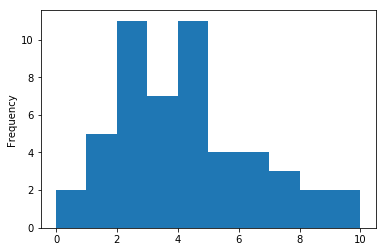

In [8]:
mage_minions.cost.plot.hist()

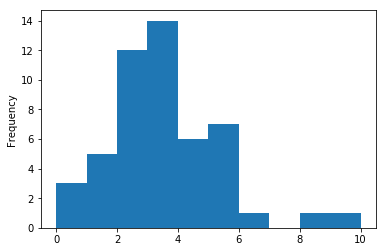

In [9]:
mage_minions.attack.plot.hist()

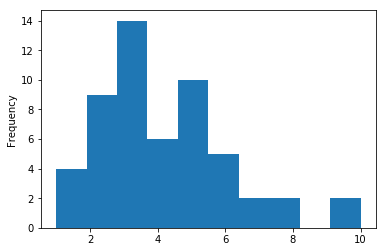

In [10]:
mage_minions.health.plot.hist()